<h3>1. Load the data set.</h3>

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('student-mat.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [124]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


<h3>2. Add a binary categorical variable called "finalResult", with level "pass" if the variable G3 is greater or equal to 10 and "fail" otherwise.</h3>

In [125]:
df['finalResult'] = df["G3"].apply(lambda x: 'pass' if x> 9 else 'fail')

In [126]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,finalResult
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass


<h3>3. Add a categorical variable called "academicGrade", with five levels "A", "B", "C", "D", "E" depending on whether the variable G3 is between 16 and 20, 14 and 15, 12 and 13, 10 and 11, 0 and 9</h3>

In [127]:
df['academicGrade'] = df["G3"].apply(lambda x: 'A' if x>15 and x<21 else 'B' if x>13
                                     and x<16 else 'C' if x>11 and x<14 else 'D' if x>9 and x<12 else 'E' )

In [128]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,finalResult,academicGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,fail,E
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,fail,E
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,pass,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,pass,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,pass,D


<h3>4.1 Study individually the different variables (descriptives statistics and charts).</h3>

In [129]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<AxesSubplot:xlabel='school', ylabel='count'>

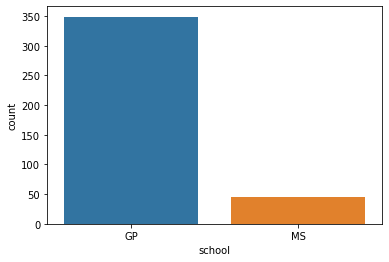

In [130]:
sns.countplot(x= df["school"])

<AxesSubplot:xlabel='sex', ylabel='count'>

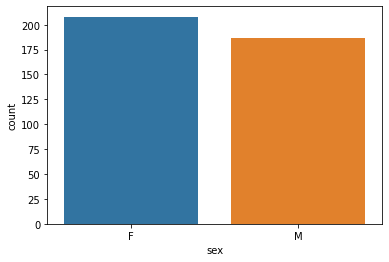

In [131]:
sns.countplot(x= df["sex"])

<AxesSubplot:xlabel='address', ylabel='count'>

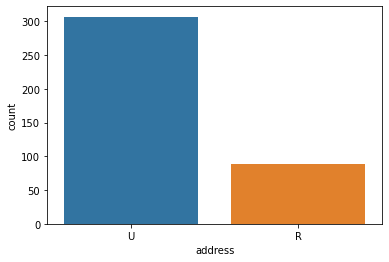

In [132]:
sns.countplot(x= df["address"])

<AxesSubplot:xlabel='famsize', ylabel='count'>

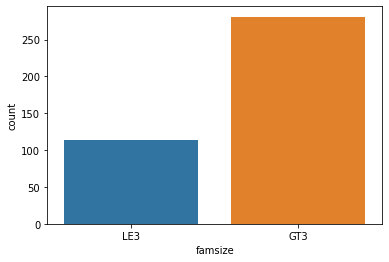

In [133]:
sns.countplot(x=df["famsize"], order=["LE3","GT3"])

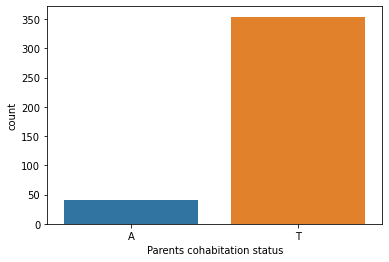

In [134]:
fig = sns.countplot(x= df["Pstatus"])
plt.xlabel("Parents cohabitation status")
plt.show(fig)

<AxesSubplot:xlabel='Mjob', ylabel='count'>

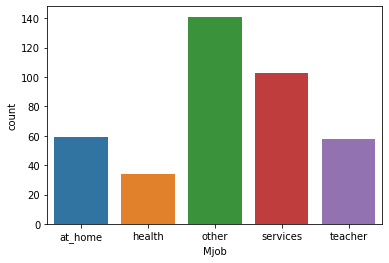

In [135]:
sns.countplot(x= df["Mjob"])

<AxesSubplot:xlabel='Fjob', ylabel='count'>

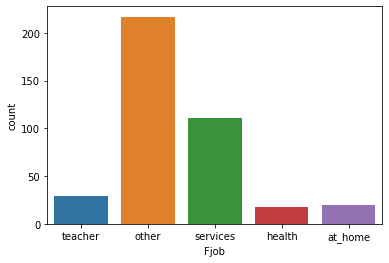

In [136]:
sns.countplot(x= df["Fjob"])

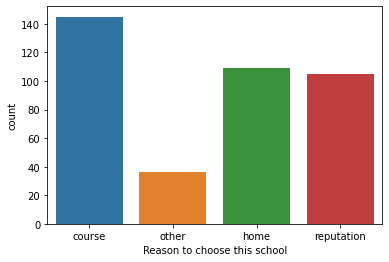

In [137]:
fig = sns.countplot(x= df["reason"])
plt.xlabel("Reason to choose this school")
plt.show(fig)

<AxesSubplot:xlabel='guardian', ylabel='count'>

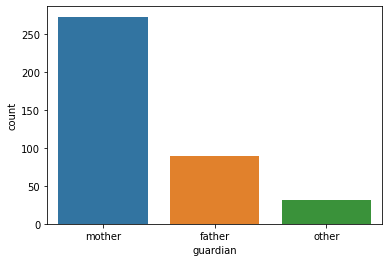

In [138]:
sns.countplot(x= df["guardian"])

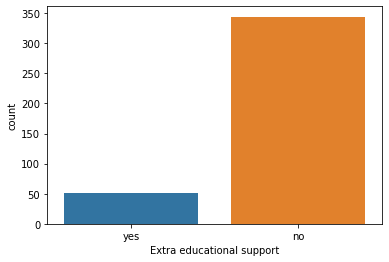

In [139]:
fig = sns.countplot(x= df["schoolsup"])
plt.xlabel("Extra educational support")
plt.show(fig)

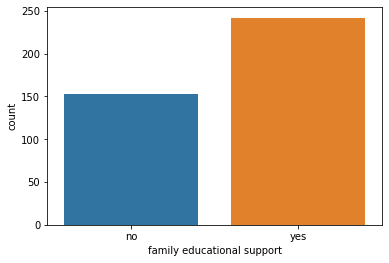

In [140]:
fig = sns.countplot(x= df["famsup"])
plt.xlabel("family educational support")
plt.show(fig)

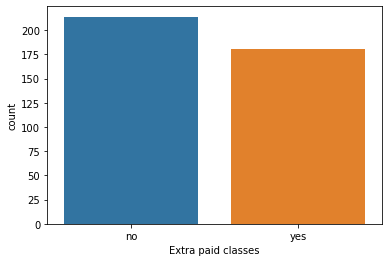

In [141]:
fig = sns.countplot(x= df["paid"])
plt.xlabel("Extra paid classes")
plt.show(fig)

<AxesSubplot:xlabel='activities', ylabel='count'>

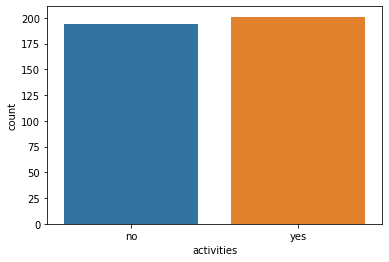

In [142]:
sns.countplot(x= df["activities"])

<AxesSubplot:xlabel='nursery', ylabel='count'>

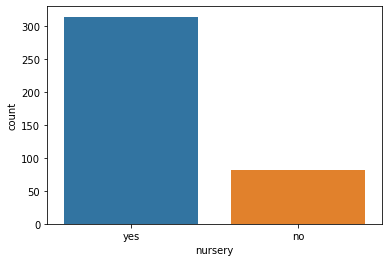

In [143]:
sns.countplot(x= df["nursery"])

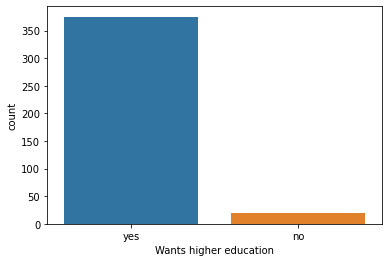

In [144]:
fig = sns.countplot(x= df["higher"])
plt.xlabel("Wants higher education")
plt.show(fig)

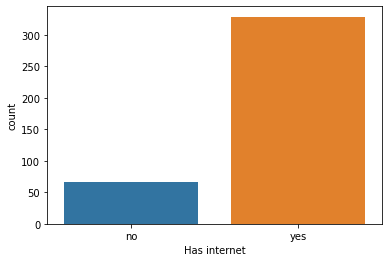

In [145]:
fig = sns.countplot(x= df["internet"])
plt.xlabel("Has internet")
plt.show(fig)

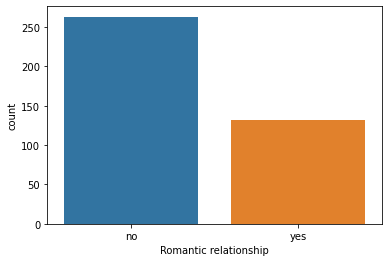

In [146]:
fig = sns.countplot(x= df["romantic"])
plt.xlabel("Romantic relationship")
plt.show(fig)

In [195]:
dfp = pd.read_csv('student-por.csv', sep=';')
dfp['finalResult'] = dfp["G3"].apply(lambda x: 'pass' if x> 9 else 'fail')
dfp['academicGrade'] = dfp["G3"].apply(lambda x: 'A' if x>15 and x<21 else 'B' if x>13
                                     and x<16 else 'C' if x>11 and x<14 else 'D' if x>9 and x<12 else 'E' )

Text(0.5, 0, 'Portugais Final Result ')

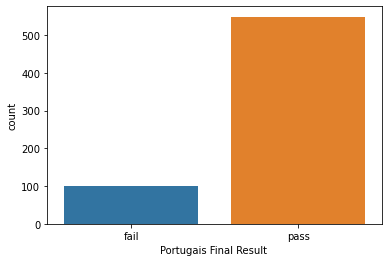

In [196]:
fig = sns.countplot(x= dfp["finalResult"], order=['fail','pass'])
plt.xlabel("Portugais Final Result ")

Text(0.5, 0, 'Maths Final Result')

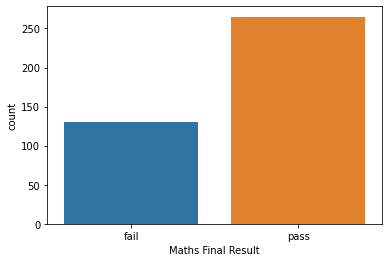

In [197]:
fig = sns.countplot(x= df["finalResult"])
plt.xlabel('Maths Final Result')

Text(0.5, 0, 'Portugais Academic Grade')

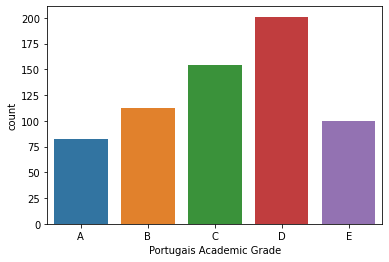

In [198]:
fig = sns.countplot(x= dfp["academicGrade"] , order=["A","B","C","D","E"])
plt.xlabel("Portugais Academic Grade")

Text(0.5, 0, 'Maths Academic Grade')

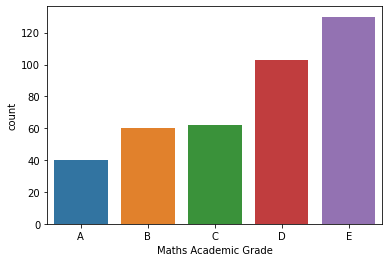

In [199]:
fig = sns.countplot(x= df["academicGrade"] , order=["A","B","C","D","E"])
plt.xlabel("Maths Academic Grade")

Text(0.5, 0, 'Portugais G3')

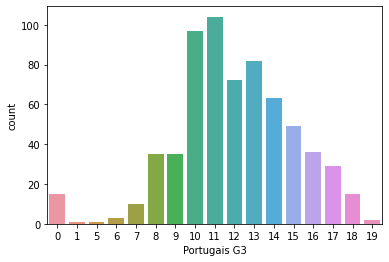

In [201]:
fig = sns.countplot(x= dfp["G3"])
plt.xlabel('Portugais G3')

Text(0.5, 0, 'Maths G3')

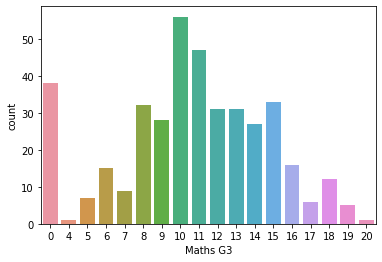

In [202]:
fig = sns.countplot(x= df["G3"])
plt.xlabel('Maths G3')

In [150]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<AxesSubplot:>

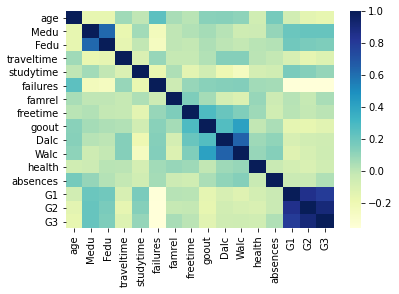

In [151]:
sns.heatmap(df.corr()
,cmap="YlGnBu")

haute corrélation entre les notes de la première periode (G1), seconde periode(G2) et la note finale (G3)

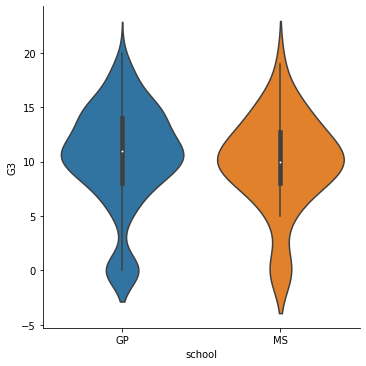

In [152]:
sns.catplot(kind="violin",x="school", y="G3", data=df)

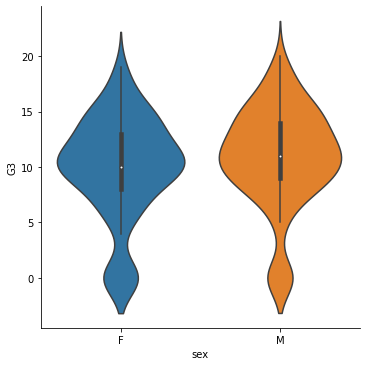

In [153]:
sns.catplot(kind="violin", x="sex", y="G3", data=df)

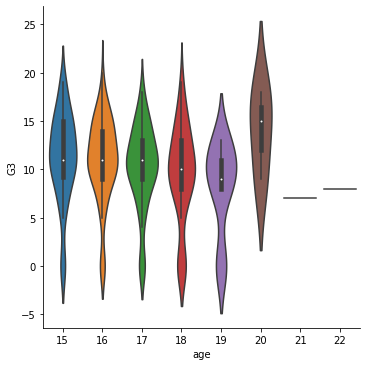

In [154]:
sns.catplot(kind="violin",x="age", y="G3", data=df)

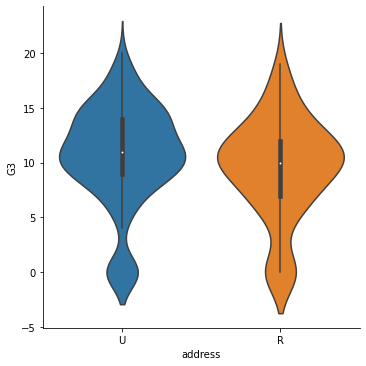

In [155]:
sns.catplot(kind="violin",x="address", y="G3", data=df)

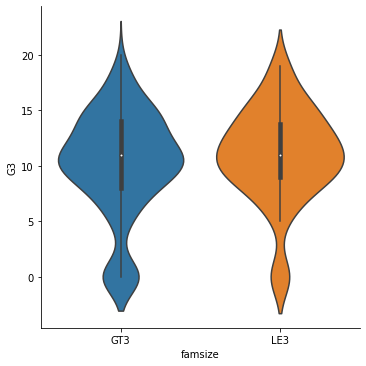

In [156]:
sns.catplot(kind="violin",x="famsize", y="G3", data=df)

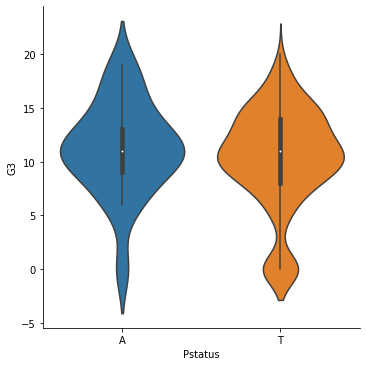

In [157]:
sns.catplot(kind="violin",x="Pstatus", y="G3", data=df)

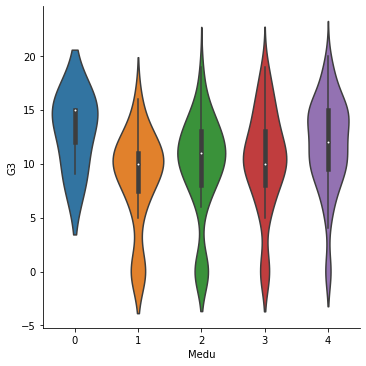

In [158]:
sns.catplot(kind="violin",x="Medu", y="G3", data=df)

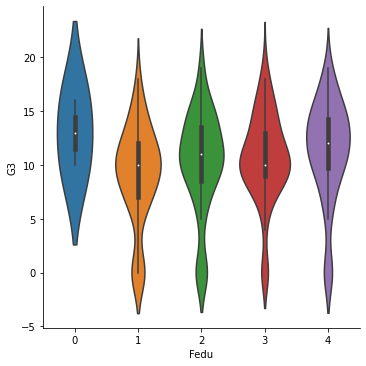

In [159]:
sns.catplot(kind="violin",x="Fedu", y="G3", data=df)

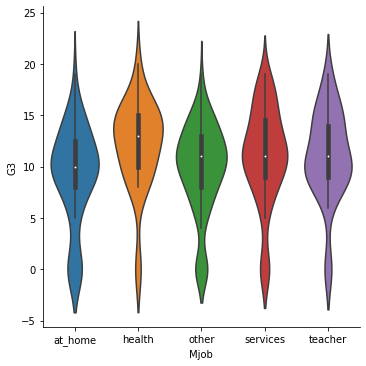

In [160]:
sns.catplot(kind="violin",x="Mjob", y="G3", data=df)

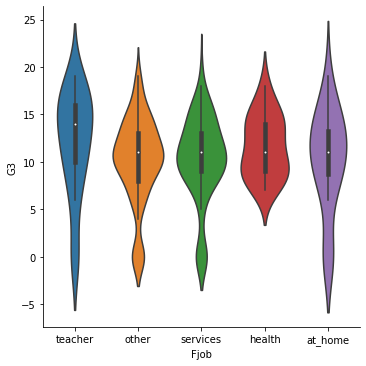

In [161]:
sns.catplot(kind="violin",x="Fjob", y="G3", data=df)

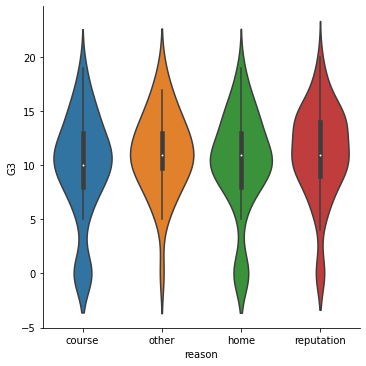

In [162]:
sns.catplot(kind="violin",x="reason", y="G3", data=df)

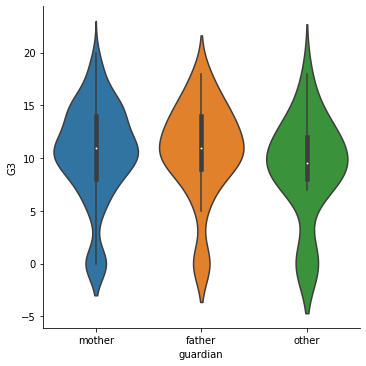

In [163]:
sns.catplot(kind="violin",x="guardian", y="G3", data=df)

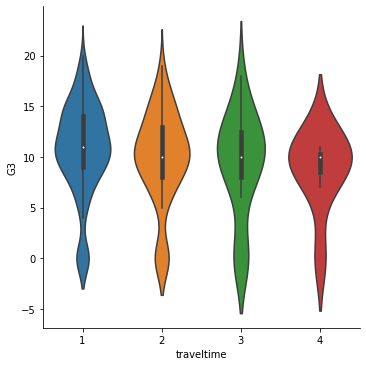

In [164]:
sns.catplot(kind="violin",x="traveltime", y="G3", data=df)

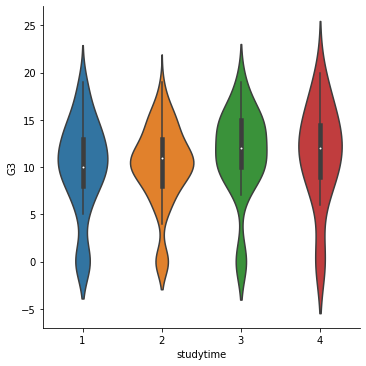

In [165]:
sns.catplot(kind="violin",x="studytime", y="G3", data=df)

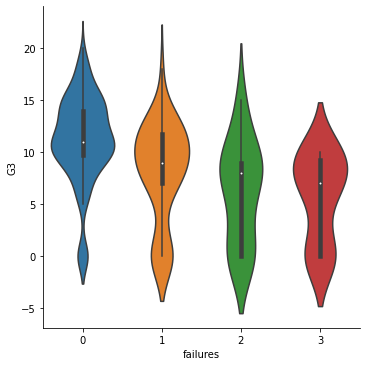

In [166]:
sns.catplot(kind="violin",x="failures", y="G3", data=df)

**forte relation entre les mauvaises notes dans le passé et les notes actuelles**

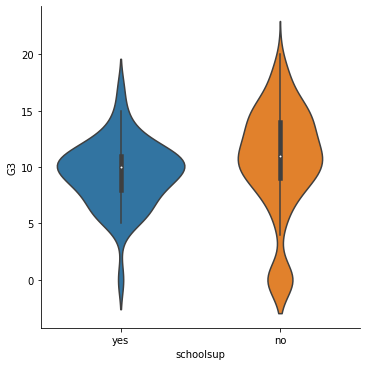

In [167]:
sns.catplot(kind="violin",x="schoolsup", y="G3", data=df)

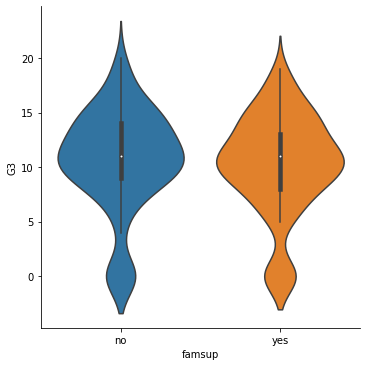

In [168]:
sns.catplot(kind="violin",x="famsup", y="G3", data=df)

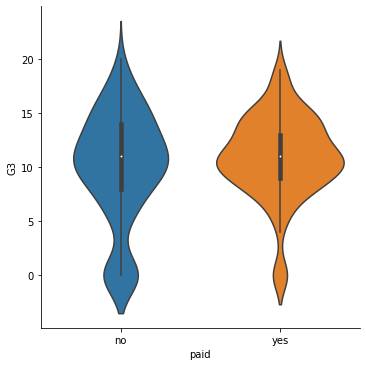

In [169]:
sns.catplot(kind="violin",x="paid", y="G3", data=df)

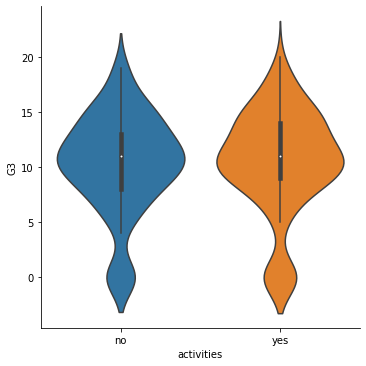

In [170]:
sns.catplot(kind="violin",x="activities", y="G3", data=df)

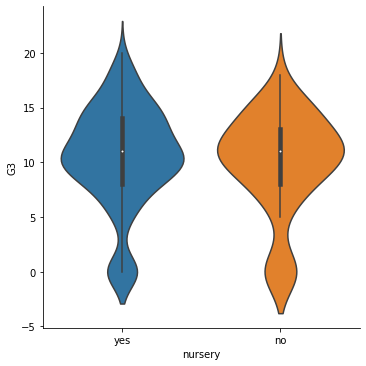

In [171]:
sns.catplot(kind="violin",x="nursery", y="G3", data=df)

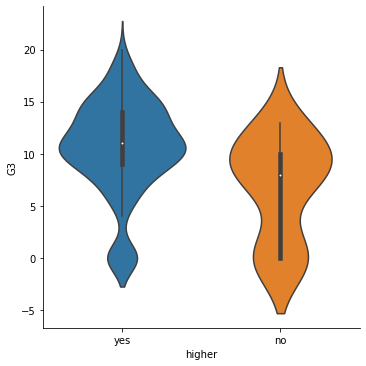

In [172]:
sns.catplot(kind="violin",x="higher", y="G3", data=df)

**les etudiants qui visent une formation superieur ont generalement des meilleurs notes**

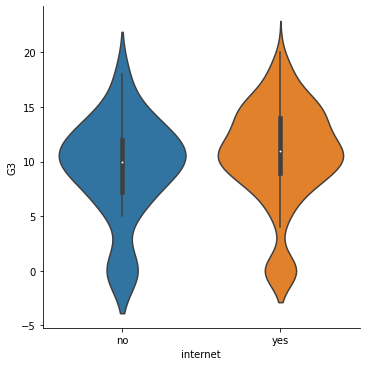

In [173]:
sns.catplot(kind="violin",y="G3", x="internet",  data=df)

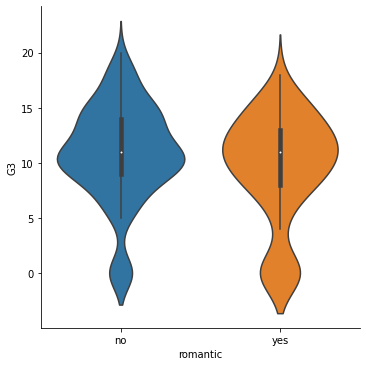

In [174]:
sns.catplot(kind="violin",y="G3", x="romantic",  data=df)

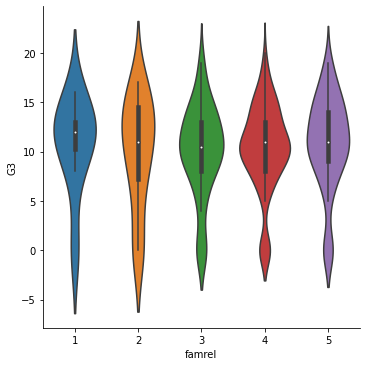

In [175]:
sns.catplot(kind="violin",x="famrel", y="G3",  data=df)

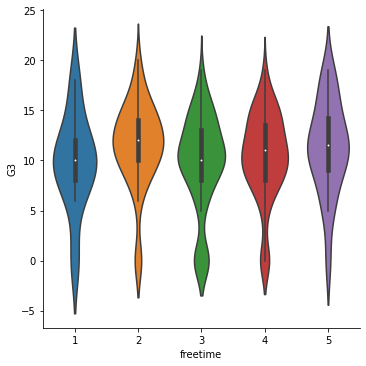

In [176]:
sns.catplot(kind="violin",x="freetime", y="G3",  data=df)

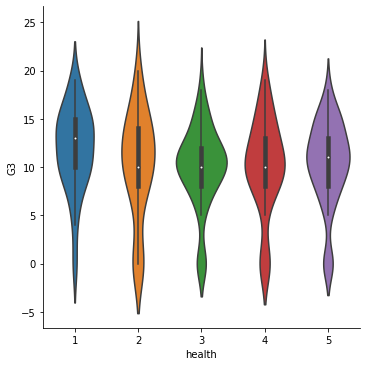

In [177]:
sns.catplot(kind="violin",y="G3", x="health",  data=df)

Text(0.5, 6.79999999999999, 'Portugais Academic Grade')

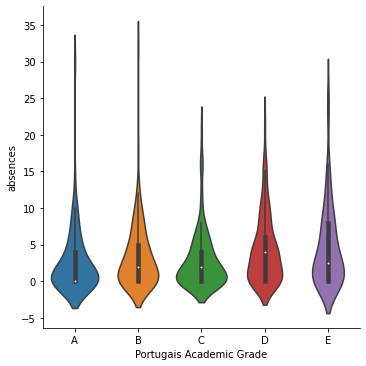

In [204]:
fig = sns.catplot(kind="violin",x="academicGrade", y="absences",  data=dfp, order=['A','B','C','D','E'])
plt.xlabel("Portugais Academic Grade")

Text(0.5, 6.79999999999999, 'Maths Academic Grade')

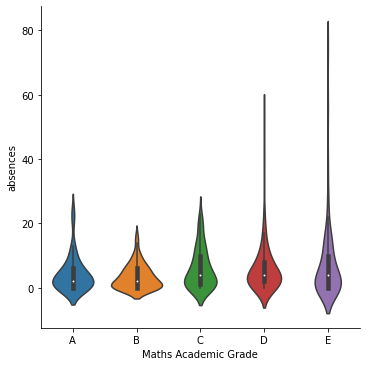

In [205]:
fig = sns.catplot(kind="violin",x="academicGrade", y="absences",  data=df, order=['A','B','C','D','E'])
plt.xlabel("Maths Academic Grade")

In [179]:
dum_df = pd.get_dummies(df, columns=["school","academicGrade","finalResult","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"], prefix=["school","academicGrade","finalResult","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"] )

<h3>On a créé une méthode pour calculer les features qui présentent une corrélation avec Target(G3) d'une valeur absolue majeur que 0.2 et les trier par leur importance</h3>

In [180]:
def significative_corr(df,target):
    dic = {} 
    features = []
    for f in df.columns:
        corr_value = df[str(f)].corr(target)
        if abs(corr_value) > 0.2:
            dic.update({f: corr_value})
    sort = sorted(dic.items(), key=lambda kv: kv[1])
    for element in sort:
        features.append(element[0])
    return df[features].corr()


<AxesSubplot:>

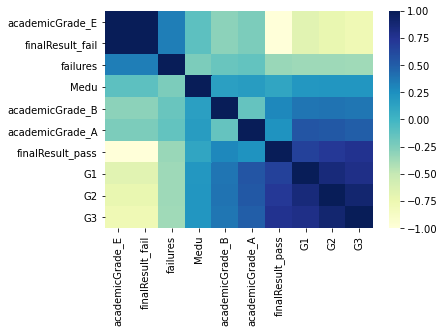

In [181]:
sns.heatmap(significative_corr(dum_df,df["G3"])
,cmap="YlGnBu")